In [134]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
sns.set(rc={"figure.figsize": (10, 7)})


In [135]:
titanic_data = pd.read_csv(
    r"D:\Projects\PythonProjects\DS-Rush\data\titanic\train.csv")


In [136]:
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
X = titanic_data.drop(
    ["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_data.Survived


In [139]:
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [140]:
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [141]:
X = pd.get_dummies(X)


In [142]:
X.fillna({"Age": X.Age.median()}, inplace=True)


In [143]:
X.isnull().sum()


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [144]:
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [145]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [146]:
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

[Text(0.6176985327060932, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.39422323028673834, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.19749663978494625, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.06630824372759857, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.05913978494623656, 0.775, 'Age <= 10.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.05197132616487455, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.06630824372759857, 0.725, 'SibSp <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05913978494623656, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07347670250896057, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07347670250896057, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3286850358422939, 0.825, 'Embarked_C <= 0.5\nentropy = 0.477\

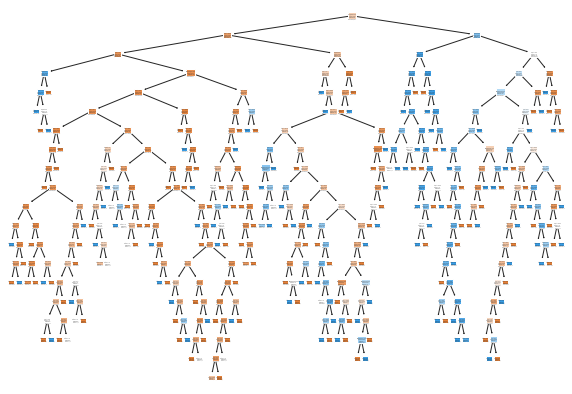

In [147]:
from sklearn.tree import plot_tree
plot_tree(clf,
          filled=True,
          #   class_names=["Negative", "Positive"],
          feature_names=list(X))


In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [149]:
X_train.shape


(596, 10)

In [150]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [151]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)


0.9798657718120806

In [152]:
clf.score(X_test, y_test)


0.7762711864406779

In [153]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8203389830508474

In [ ]:

max_deep_values = range(1, 51)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score]})
    scores_data = scores_data.append(tmp_score_data)


In [155]:
scores_data.head()


,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [156]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score", "test_score"],
                           var_name="set_type",
                           value_name="score")


In [157]:
scores_data_long


,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
95,46,test_score,0.766102
96,47,test_score,0.776271
97,48,test_score,0.776271
98,49,test_score,0.779661


<AxesSubplot:xlabel='max_depth', ylabel='score'>

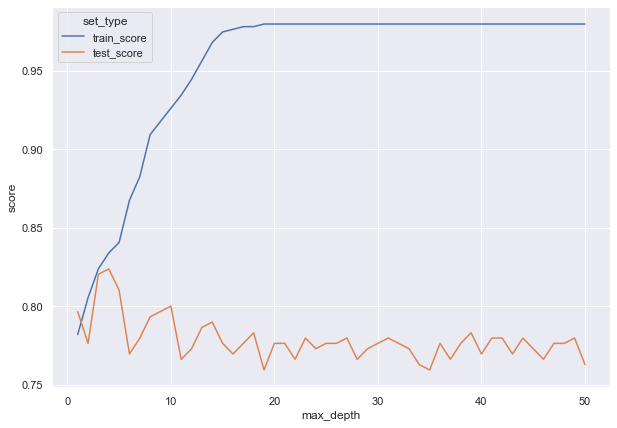

In [158]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


# Cross Validation

In [159]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)


In [160]:
cross_val_score(clf, X_train, y_train, cv=5).mean()


0.7886274509803922

In [ ]:

max_deep_values = range(1, 101)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    mean_cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score],
         "cross_val_score": [mean_cross_val]})
    scores_data = scores_data.append(tmp_score_data)


In [162]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score",
                                       "test_score", "cross_val_score"],
                           var_name="set_type",
                           value_name="score")


In [163]:
scores_data_long.query("set_type == 'cross_val_score'").head()


,max_depth,set_type,score
200,1,cross_val_score,0.781961
201,2,cross_val_score,0.770196
202,3,cross_val_score,0.790322
203,4,cross_val_score,0.788627
204,5,cross_val_score,0.800392


<AxesSubplot:xlabel='max_depth', ylabel='score'>

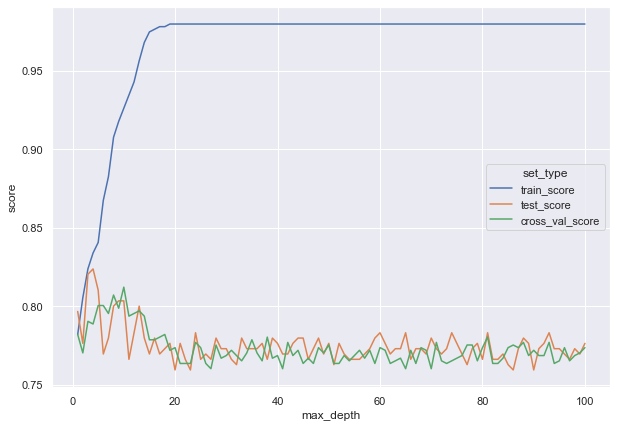

In [164]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


In [165]:
best_classifier = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)


In [166]:
# cross_val_score(best_classifier, X_train, y_train, cv=5).mean()
cross_val_score(best_classifier, X_test, y_test, cv=5).mean()


0.8237288135593221

# Tasks

In [195]:
data = pd.read_csv(
    "https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
data_test = pd.read_csv(
    "https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)
np.random.seed(0)



In [196]:
data.head()


,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [197]:
X_train = data.drop(["species"], axis=1)
y_train = data.species

X_test = data_test.drop(["species"], axis=1)
y_test = data_test.species


In [198]:
len_range = 100 + 1
tree_depth_set = range(1, len_range)
tmp_score_data = {"max_depth": list(range(1, len_range)),
                  "cross_val_score": [],
                  "test_score": [], }
for max_deep in tree_depth_set:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_deep)

    clf.fit(X_train, y_train)

    test_score = clf.score(X_test, y_test)
    mean_cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()

    tmp_score_data["cross_val_score"].append(mean_cross_val)
    tmp_score_data["test_score"].append(test_score)


In [199]:
scores_data = pd.DataFrame(tmp_score_data)
scores_data.head()

,max_depth,cross_val_score,test_score
0,1,0.70,0.60
1,2,0.95,0.94
2,3,0.96,0.94
3,4,0.96,0.94
4,5,0.96,0.92


In [200]:
scores_data_long = pd.melt(scores_data,
                           id_vars=["max_depth"],
                           value_vars=["cross_val_score", "test_score"],
                           var_name="set_type",
                           value_name="score")

In [201]:
scores_data_long.head()

,max_depth,set_type,score
0,1,cross_val_score,0.70
1,2,cross_val_score,0.95
2,3,cross_val_score,0.96
3,4,cross_val_score,0.96
4,5,cross_val_score,0.96


<AxesSubplot:xlabel='max_depth', ylabel='score'>

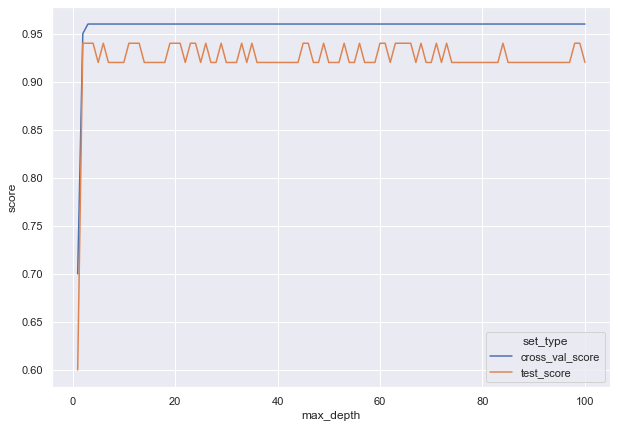

In [202]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")